**CHARIS ECG Data Preprocessing and R-R Interval Measurement**

1. **Install Required Library**:  
   Installs the `wfdb` library, which is used to handle ECG data processing.

2. **Import Libraries**:  
   Imports `wfdb` for ECG signal processing, `numpy` for numerical operations, `matplotlib` for plotting, and `csv` for data handling.

3. **Read ECG Signal**:  
   Loads the ECG data from the CHARIS dataset, reading a specified record (e.g., "charis13") within a defined sample range to process the first 3 million samples.

4. **Extract ECG Data**:  
   Isolates the ECG signal from the loaded data and prints its shape for verification.

5. **R-Peak Detection**:  
   Detects R-peaks within a specific sample window (from 0 to 3,000,000 samples) using the QRS detector in the `wfdb` library.

6. **Visualize ECG Signal**:  
   Plots the ECG waveform over a selected range to visually inspect the signal and detected R-peaks.

7. **Iterative R-Peak Refinement**:  
   For each detected R-peak, finds the precise peak by identifying the highest signal point within each R-R interval, ensuring accurate peak detection.

8. **Calculate R-R Intervals**:  
   Computes the R-R intervals (the time difference between successive R-peaks) based on detected peak positions, preparing the data for further analysis of heart rate variability.

---

This code processes ECG data by detecting and refining R-peak positions, enabling the calculation of R-R intervals for heart rate variability analysis. The refined R-peak detection ensures higher accuracy in interval measurements, which can be saved or visualized for analysis.


In [1]:
!pip install wfdb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.2 MB/s eta 0:00:00


In [2]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import csv
from wfdb import processing

In [3]:
# Read the ECG signal from the 'charisdb/charis1' record in the CHARIS database
signal, fields = wfdb.rdsamp('charisdb/charis13', channels = [1],  sampfrom=0, sampto=3000000, pn_dir='charisdb/1.0.0/')

In [4]:
# Get the ECG signal
ecg = signal[:,0]
print(ecg.shape)

(3000000,)


In [ ]:
sf=0
st=3000000
rpeaks = wfdb.processing.xqrs_detect(sig=ecg[sf:st], fs=fields.get('fs'))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...


In [ ]:
print(rpeaks)

[  17   30   50   82  115  147  180  212  245  277  310  342  375  388
  411  440  473  505  538  570  606  635  667  699  732  764  797  829
  861  894  926  959  991 1023 1056 1088 1121 1153 1186 1218 1250 1283
 1315 1348 1384 1413 1446 1478 1511 1543 1576 1608 1641 1673 1706 1738
 1771 1804 1836 1869 1901 1934 1967 1999 2032 2065 2097 2130 2166 2195
 2228 2260 2293 2325 2358 2390 2423 2455 2488 2520 2553 2585 2618 2654
 2683 2715 2748 2780 2813 2845 2878 2910 2943 2975 3007 3040 3073 3105
 3138 3170 3203 3235 3268 3300 3333 3365 3398 3430 3463 3499 3528 3560
 3593 3625 3658 3690 3723 3755 3788 3820 3853 3885 3918 3950 3983 4015
 4047 4080 4112 4145 4181 4210 4242 4274 4307 4339 4372 4404 4437 4469
 4502 4534 4567 4599 4632 4664 4697 4729 4762 4794 4827 4859 4892 4925
 4957 4990 5023 5055 5088 5120 5153 5186 5218 5251 5284 5316 5349 5381
 5414 5446 5479 5512 5544 5577 5609 5642 5674 5707 5739 5772 5804 5837
 5870 5902 5935 5967 6000 6033 6065 6098 6130 6163 6195 6228 6260 6293
 6326 

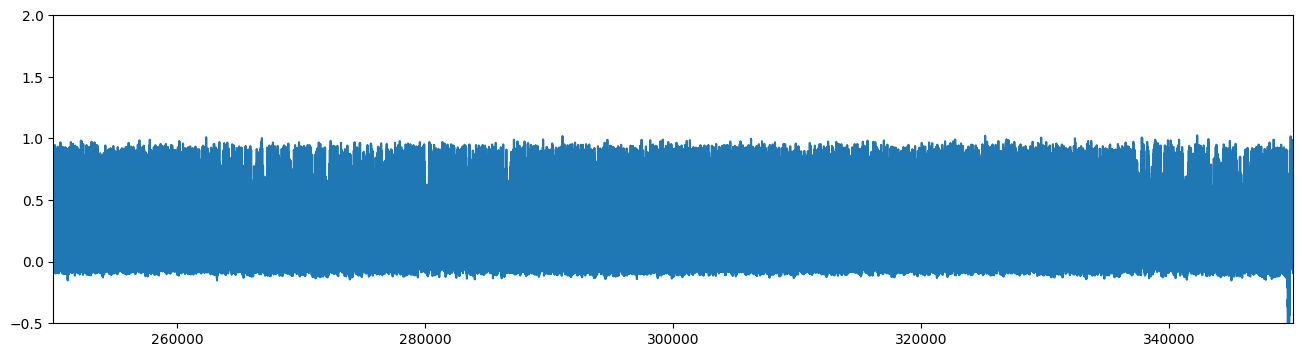

In [ ]:
plt.plot(ecg)
plt.xlim(250000, 350000)
plt.ylim(-0.5, 2)
plt.gcf().set_size_inches(16, 4)

In [ ]:
# Detect R-peaks using the QRS detector in the WFDB library
sf = 0
st = sf + 100000
rpeaks = wfdb.processing.xqrs_detect(sig=ecg, sampfrom=sf, sampto=st, fs=fields.get('fs'))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [ ]:
#make sure the annotation is at the peak
max_signal = []
for i in range(len(rpeaks) - 1):
    start = rpeaks[i]
    end = rpeaks[i + 1]
    max_signal.append(start + np.argmax(ecg[start:end]))

In [ ]:
# Calculate the R-R interval in samples
rr_interval = np.diff(max_signal)

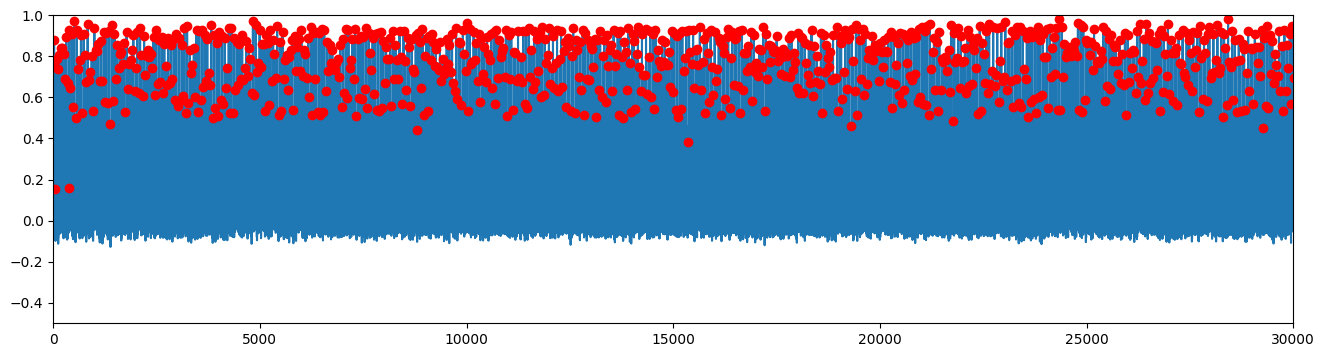

In [ ]:
plt.plot(ecg)
plt.plot(max_signal, ecg[max_signal], 'ro')
plt.xlim(0, 30000)
plt.ylim(-0.5, 1)
plt.gcf().set_size_inches(16, 4)

(0.0, 1.5)

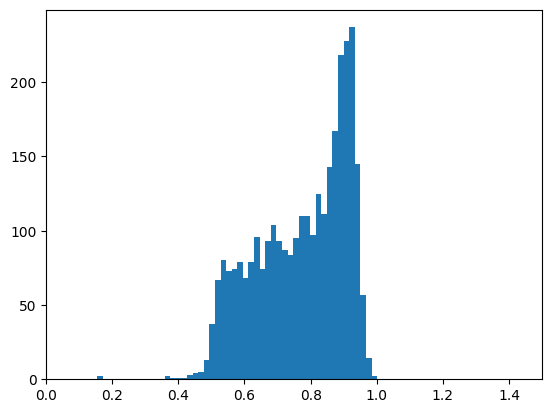

In [ ]:
plt.hist(ecg[max_signal], bins=50)
plt.xlim(0, 1.5)

In [ ]:
with open('charis1_18_rpeaks_rr_interval.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['R-Peaks (Sample Index)', 'R-R Interval (Samples)'])
    for i, rpeak in enumerate(max_signal):
        rr_interval_ms = (rr_interval[i-1]/50) * 1000
        writer.writerow([rpeak, rr_interval_ms])

In [ ]:
signals = ecg[max_signal]
signals = signals[np.where(ecg[max_signal] > 0.15)]
max_signal = np.array(max_signal)[np.where(ecg[max_signal] > 0.15)[0]]


3079


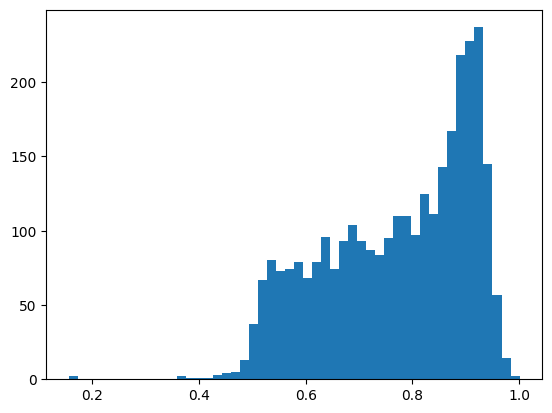

In [ ]:
plt.hist(signals, bins=50)
print(signals.size)

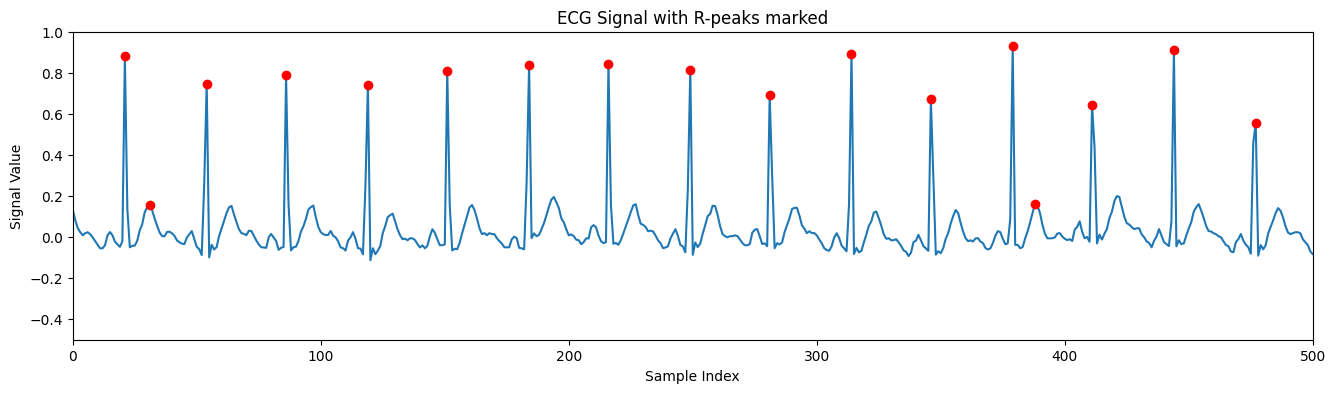

In [ ]:
# Plot the ECG signal with R-peaks marked
plt.plot(ecg)
plt.plot(max_signal, signals, 'ro')
plt.xlim(sf, 500)
plt.ylim(-0.5, 1)
plt.gcf().set_size_inches(16, 4)
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.title('ECG Signal with R-peaks marked')
plt.show()

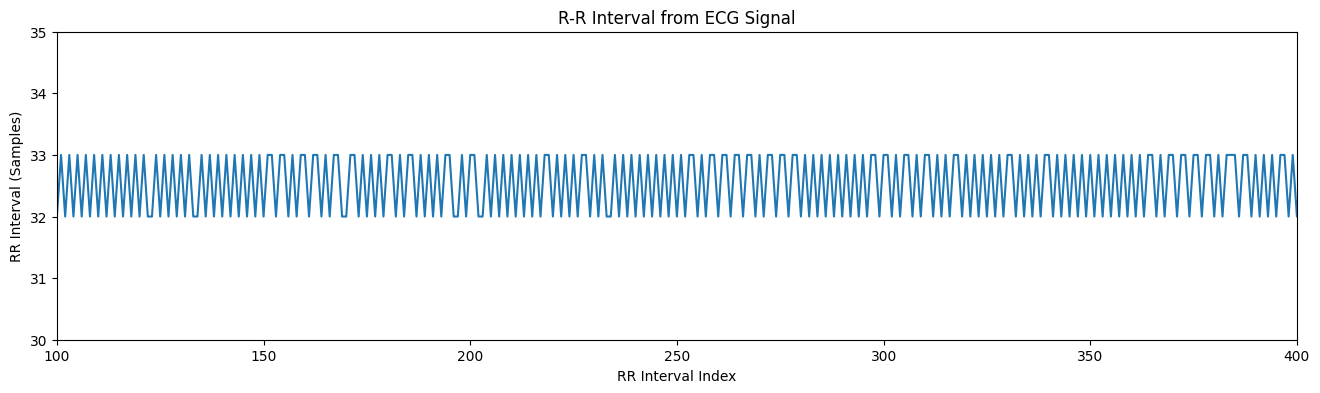

In [ ]:
# Plot the R-R interval
plt.plot(rr_interval)
plt.xlabel('RR Interval Index')
plt.xlim(100, 400)
plt.gcf().set_size_inches(16, 4)
plt.ylim(30, 35)
plt.ylabel('RR Interval (Samples)')
plt.title('R-R Interval from ECG Signal')
plt.show()

In [ ]:
for j in range(13, 26):
  sf = j * 100000
  st = sf + 100000
  rpeaks = wfdb.processing.xqrs_detect(sig=ecg, sampfrom=sf, sampto=st, fs=fields.get('fs'))

  #make sure the annotation is at the peak
  max_signal = []
  for h in range(len(rpeaks) - 1):
      start = rpeaks[h]
      end = rpeaks[h + 1]
      max_signal.append(start + np.argmax(ecg[start:end]))

  # clean the data
  signals = ecg[max_signal]
  signals = signals[np.where(ecg[max_signal] > 0.15)]
  max_signal = np.array(max_signal)[np.where(ecg[max_signal] > 0.15)[0]]

  # Calculate the R-R interval in samples
  rr_interval = np.diff(max_signal)
  file_num = j + 1
  name = ("charis13_" + "%d" + "_rpeaks_rr_interval.csv") % file_num

  with open(name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['R-Peaks (Sample Index)', 'R-R Interval (Samples)'])
    for i, rpeak in enumerate(max_signal):
        rr_interval_ms = (rr_interval[i-1]/50) * 1000
        writer.writerow([rpeak, rr_interval_ms])

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learn

KeyboardInterrupt: 

CHARIS DATA: Feature Extraction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [ ]:
# Create empty arrays to store the results
bpm_arr = []
mean_arr = []
range_arr = []
iqr_arr = []
var_arr = []
std_arr = []
cv_arr = []
gender_arr = []
age_arr = []
classification = []
name = []

In [ ]:
#patient_gender = ['M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M']
patient_gender = [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
patient_age = [19, 25, 74, 44, 21, 20, 73, 45, 56, 43, 55, 60]
sampling_frequency = 50
sampling_time = 100000
sampling_seconds = sampling_time / sampling_frequency

In [ ]:
df_list = []
for i in range(1, 13):
  filefolder = (filepath + "charis" + "%d" + "/") %i
  for filename in os.listdir(filefolder):
    df = pd.read_csv(filefolder + filename)
    df['anno'] = filename
    df_list.append(df)

full_df = pd.concat(df_list)
#full_df
# Calculate the interquartile range (IQR)
full_q1 = np.percentile(full_df['R-R Interval (Samples)'], 25)
full_q3 = np.percentile(full_df['R-R Interval (Samples)'], 75)
full_iqr_rr = full_q3 - full_q1

# Calculate the lower and upper bounds for outliers
full_lower_bound = full_q1 - 1.5 * full_iqr_rr
full_upper_bound = full_q3 + 1.5 * full_iqr_rr

# Remove outliers from the data
full_df_clean = full_df[(full_df['R-R Interval (Samples)'] >= full_lower_bound) & (full_df['R-R Interval (Samples)'] <= full_upper_bound)]
full_data_clean = full_df_clean['R-R Interval (Samples)']
full_data_clean = pd.DataFrame(full_data_clean)

<Axes: >

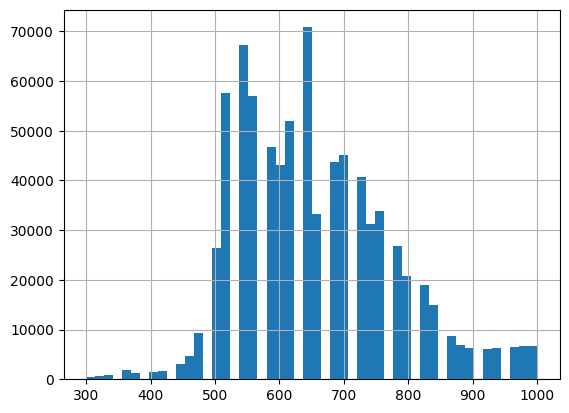

In [ ]:
full_data_clean['R-R Interval (Samples)'].hist(bins=50)

In [ ]:
for i in range(1, 13):
  filefolder = (filepath + "charis" + "%d" + "/") %i

  for filename in os.listdir(filefolder):
    df = pd.read_csv(filefolder + filename)
    peaks = len(df['R-R Interval (Samples)'])

    # Remove outliers from the data
    df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
    data_clean = df_clean['R-R Interval (Samples)']
    total = np.sum(data_clean)
    #Average heart rate
    bpm = (peaks/total) *(1000) * (60)
    # Calculate the mean HRV
    mean_rr = np.mean(data_clean)
    # Calculate the range
    range_rr = np.max(data_clean) - np.min(data_clean)
    # Calculate the interquartile range (IQR)
    q1 = np.percentile(data_clean, 25)
    q3 = np.percentile(data_clean, 75)
    iqr_rr = q3 - q1
    # Calculate the variance
    var_rr = np.var(data_clean)
    # Calculate the standard deviation
    std_rr = np.std(data_clean)
    # Calculate the coefficient of variation
    cv_rr = std_rr / np.mean(data_clean) * 100

    bpm_arr.append(bpm)
    mean_arr.append(mean_rr)
    range_arr.append(range_rr)
    iqr_arr.append(iqr_rr)
    var_arr.append(var_rr)
    std_arr.append(std_rr)
    cv_arr.append(cv_rr)
    gender_arr.append(patient_gender[i-1])
    age_arr.append(patient_age[i-1])
    classification.append(1)
    name.append(filename)


In [ ]:
len(bpm_arr)

306

In [ ]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/BIOE141 Capstone/CHARIS data/tbi_matrix_2.csv'
# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BIOE141 Capstone/CHARIS data/tbi_matrix_2.csv'

<Axes: >

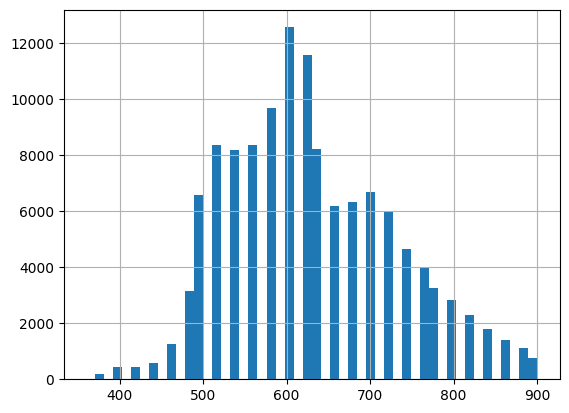

In [ ]:
data = pd.read_csv(new_filepath)
#data = data[data['Variance'] <0000]
data['Variance'].hist(bins=50)
print(np.max(data['Variance']))

In [ ]:
for i in range(1, 13):
  filefolder = (filepath + "charis" + "%d" + "/") %i

  for filename in os.listdir(filefolder):
    df = pd.read_csv(filefolder + filename)
    peaks = len(df['R-R Interval (Samples)'])

    # Remove outliers from the data
    df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
    data_clean = df_clean['R-R Interval (Samples)']
    total = np.sum(data_clean)
    #Average heart rate
    bpm = (peaks/total) *(1000) * (60)
    # Calculate the mean HRV
    mean_rr = np.mean(data_clean)
    # Calculate the range
    range_rr = np.max(data_clean) - np.min(data_clean)
    # Calculate the interquartile range (IQR)
    q1 = np.percentile(data_clean, 25)
    q3 = np.percentile(data_clean, 75)
    iqr_rr = q3 - q1
    # Calculate the variance
    var_rr = np.var(data_clean)
    # Calculate the standard deviation
    std_rr = np.std(data_clean)
    # Calculate the coefficient of variation
    cv_rr = std_rr / np.mean(data_clean) * 100

    bpm_arr.append(bpm)
    mean_arr.append(mean_rr)
    range_arr.append(range_rr)
    iqr_arr.append(iqr_rr)
    var_arr.append(var_rr)
    std_arr.append(std_rr)
    cv_arr.append(cv_rr)
    gender_arr.append(patient_gender[i-1])
    age_arr.append(patient_age[i-1])
    classification.append(1)
    name.append(filename)


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/GoogleDriveCSVs/CHARIS/charis3/'

In [ ]:
len(bpm_arr)

42

In [ ]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/BIOE141 Capstone/CHARIS data/tbi_matrix_2.csv'
# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

27447.746496654465


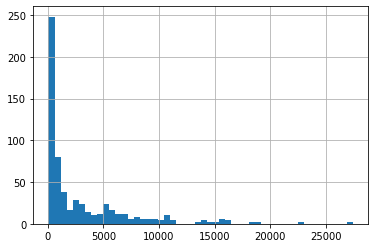

In [ ]:
data = pd.read_csv(new_filepath)
#data = data[data['Variance'] <0000]
data['Variance'].hist(bins=50)
print(np.max(data['Variance']))

charis1
charis2
charis3
charis4
charis5
charis6
charis7
charis8
charis9
charis10
charis11
charis12


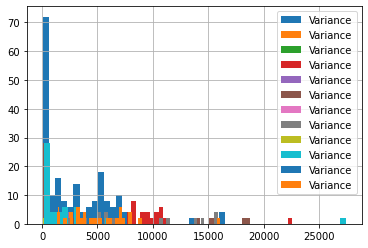

In [ ]:
for i in range(12):
  print('charis'+str(i+1))
  data[data.File.str.contains('charis'+str(i+1))]['Variance'].hist(bins=50, legend = True)

In [ ]:
np.max(data['Variance'])

27447.746496654465

In [ ]:
data = pd.read_csv(filefolder + filename)

In [ ]:
# Calculate the interquartile range (IQR)
q1 = np.percentile(df['R-R Interval (Samples)'], 25)
q3 = np.percentile(df['R-R Interval (Samples)'], 75)
iqr_rr = q3 - q1

In [ ]:
# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr_rr
upper_bound = q3 + 1.5 * iqr_rr

In [ ]:
# Remove outliers from the data
df_clean = df[(df['R-R Interval (Samples)'] >= lower_bound) & (df['R-R Interval (Samples)'] <= upper_bound)]

In [ ]:
# Print the number of outliers removed
num_outliers = len(df) - len(df_clean)
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 293


In [ ]:
print(df_clean)
data_clean = df_clean['R-R Interval (Samples)']

      R-Peaks (Sample Index)  R-R Interval (Samples)
0                         22                   600.0
1                         54                   640.0
2                         87                   660.0
3                        119                   640.0
4                        152                   660.0
...                      ...                     ...
3145                   99842                   620.0
3146                   99874                   640.0
3147                   99904                   600.0
3148                   99935                   620.0
3149                   99965                   600.0

[2857 rows x 2 columns]


In [ ]:
# Calculate the range
range_rr = np.max(data_clean) - np.min(data_clean)

In [ ]:
# Calculate the variance
var_rr = np.var(data_clean)

In [ ]:
# Calculate the standard deviation
std_rr = np.std(data_clean)

In [ ]:
# Calculate the coefficient of variation
cv_rr = std_rr / np.mean(data_clean) * 100

In [ ]:
# Print the results
print(f"Range: {range_rr:.2f}")
print(f"IQR: {iqr_rr:.2f}")
print(f"Variance: {var_rr:.2f}")
print(f"Standard deviation: {std_rr:.2f}")
print(f"Coefficient of variation: {cv_rr:.2f}%")

Range: 60.00
IQR: 20.00
Variance: 315.44
Standard deviation: 17.76
Coefficient of variation: 2.81%


In [ ]:
for filename in os.listdir(filefolder):
  df = pd.read_csv(filefolder + filename)

  # Calculate the interquartile range (IQR)
  q1 = np.percentile(df['R-R Interval (Samples)'], 25)
  q3 = np.percentile(df['R-R Interval (Samples)'], 75)
  iqr_rr = q3 - q1

  # Calculate the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr_rr
  upper_bound = q3 + 1.5 * iqr_rr

  # Remove outliers from the data
  df_clean = df[(df['R-R Interval (Samples)'] >= lower_bound) & (df['R-R Interval (Samples)'] <= upper_bound)]
  data_clean = df_clean['R-R Interval (Samples)']

  # Calculate the range
  range_rr = np.max(data_clean) - np.min(data_clean)
  # Calculate the interquartile range (IQR)
  q1 = np.percentile(data_clean, 25)
  q3 = np.percentile(data_clean, 75)
  iqr_rr = q3 - q1
  # Calculate the variance
  var_rr = np.var(data_clean)
  # Calculate the standard deviation
  std_rr = np.std(data_clean)
  # Calculate the coefficient of variation
  cv_rr = std_rr / np.mean(data_clean) * 100

  range_arr.append(range_rr)
  iqr_arr.append(iqr_rr)
  var_arr.append(var_rr)
  std_arr.append(std_rr)
  cv_arr.append(cv_rr)
